# Low Resource Language ASR model
### Lars Ericson, Catskills Research Company, OpenASR20

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

## Language Analysis

In [3]:
from Language import Language
L=Language('amharic')

/home/catskills/anaconda3/envs/openasr/lib/python3.8/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


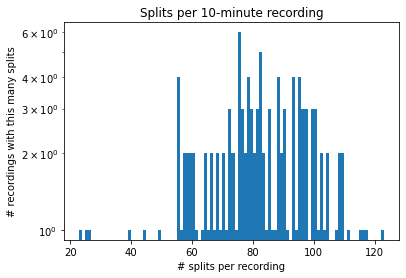

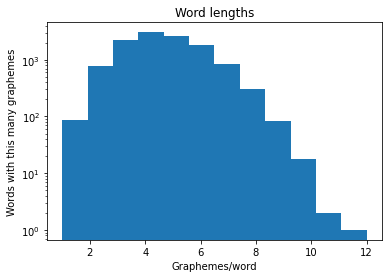

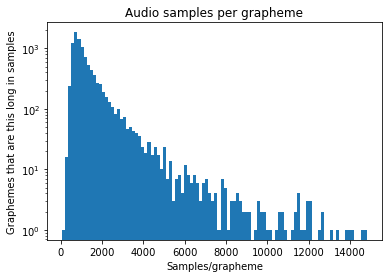

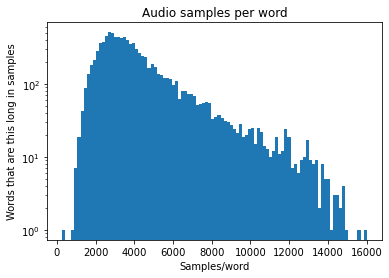

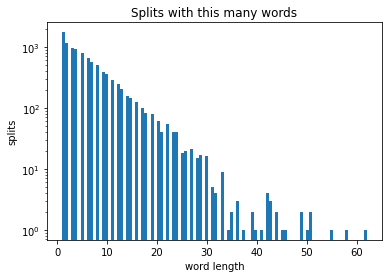

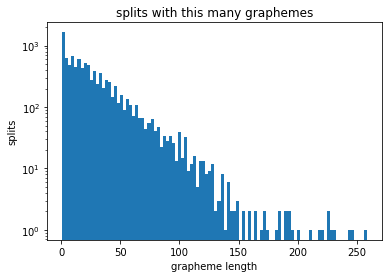

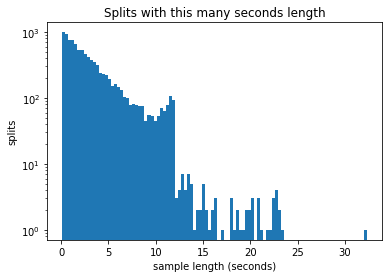

In [4]:
L.visualization()

In [5]:
dfL=L.sample_statistics()
dfL

,Corpus,Units,Measurement,Value
0,Recordings,#Hours,Hours of training speech,20.333333
1,Recordings,#Recordings,10-minute training recordings,122.000000
0,Graphemes,#Graphemes,Distinct graphemes in all transcriptions,234.000000
1,Graphemes,Length in samples,Max,14800.000000
2,Graphemes,Length in samples,Mean,1359.269261
3,Graphemes,Length in samples,Median,975.974684
4,Graphemes,Length in samples,Min,67.692308
5,Graphemes,Length in seconds,Max,1.850000
6,Graphemes,Length in seconds,Mean,0.169909
7,Graphemes,Length in seconds,Median,0.121997


## Sub splitting based on words per split and average samples per grapheme (imperfect, introduces error)

### Trim all samples aggressively and examine the longest trimmed 1-word sample and resulting distribution

In [6]:
fat=L.splits
skinny=fat.aggressive_clip_ends()
one_word_fat=[x for x in fat.artifacts if x.target.n_words==1]
one_word_skinny=[x for x in skinny.artifacts if x.target.n_words==1]
both=list(zip(one_word_fat, one_word_skinny))
one_word=sorted(both, key = lambda x: x[0].source.n_samples)
len(one_word)

/home/catskills/anaconda3/envs/openasr/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2043
  warnings.warn(
/home/catskills/anaconda3/envs/openasr/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2041
  warnings.warn(
/home/catskills/anaconda3/envs/openasr/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=2047
  warnings.warn(


1743

In [7]:
(old,new)=one_word[-1]

KEY BABEL_OP3_307_91888_20140813_180920_inLine_005_26.335_28.215
SOURCE


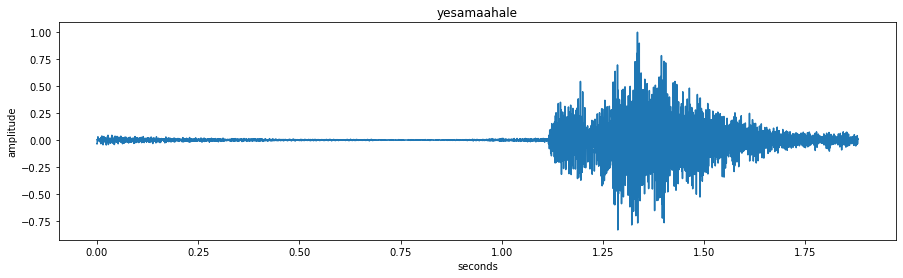

TARGET
ይሰማሀል :: yesamaahale



In [8]:
old.display()

KEY BABEL_OP3_307_91888_20140813_180920_inLine_005_26.335_28.215
SOURCE


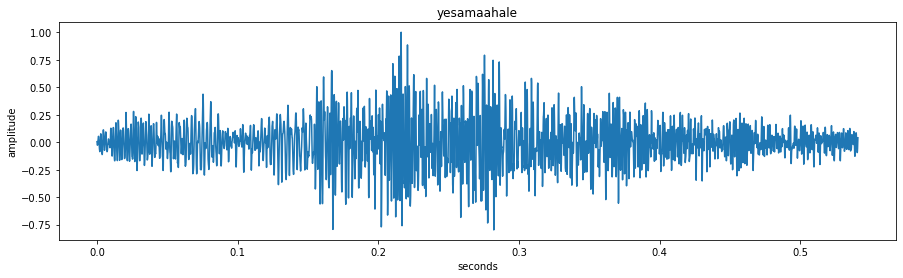

TARGET
ይሰማሀል :: yesamaahale



In [9]:
new.display()

In [10]:
fat.diff_sample_statistics(skinny)

,Corpus,Units,Measurement,Value_x,Value_y
1,Graphemes,Length in samples,Max,14800.000000,14560.000000
2,Graphemes,Length in samples,Mean,1359.269261,1286.169098
3,Graphemes,Length in samples,Median,975.974684,936.331897
5,Graphemes,Length in seconds,Max,1.850000,1.820000
6,Graphemes,Length in seconds,Mean,0.169909,0.160771
7,Graphemes,Length in seconds,Median,0.121997,0.117041
9,Split Speech,Length in samples,Max,258311.000000,251309.000000
10,Split Speech,Length in samples,Mean,26010.961187,24958.481203
11,Split Speech,Length in samples,Median,17944.500000,17008.000000
12,Split Speech,Length in samples,Min,897.000000,522.000000


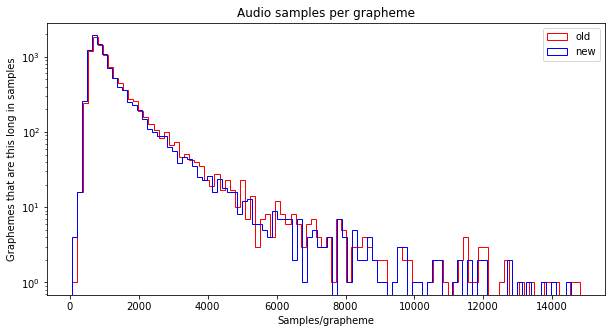

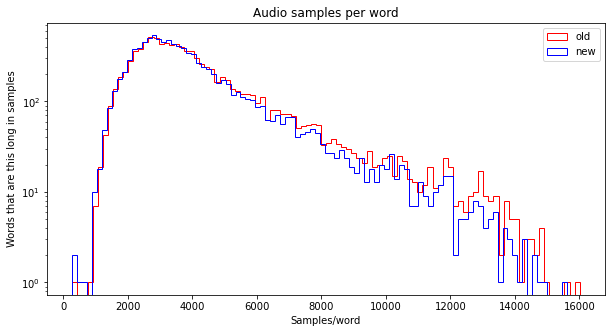

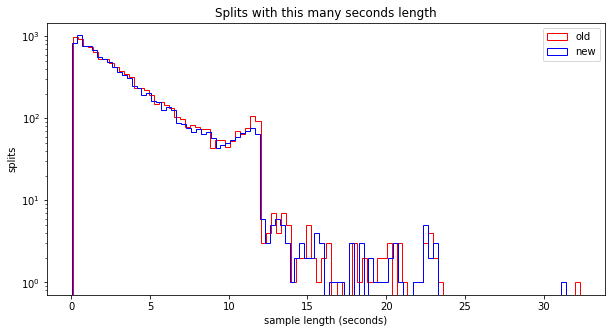

In [11]:
fat.diff_visualization(skinny)

### Split the longest sample by silence gaps, aggressively trim each, then allocate graphemes evenly over the clips, maximizing alignment of graphemes to word boundaries on silence

In [12]:
df=skinny.sample_statistics()
max_words=int(df[(df.Corpus=="Split Transcription") & (df.Units=="Length in words") & (df.Measurement=="Max")].Value.values[0])
max_words

62

In [13]:
target_max_sample_length=int(df[(df.Corpus=="Split Speech") & (df.Units=="Length in samples") & (df.Measurement=="Median")].Value.values[0])
target_max_sample_length

17008

In [14]:
df

,Corpus,Units,Measurement,Value
0,Graphemes,#Graphemes,Distinct graphemes in all transcriptions,234.000000
1,Graphemes,Length in samples,Max,14560.000000
2,Graphemes,Length in samples,Mean,1286.169098
3,Graphemes,Length in samples,Median,936.331897
4,Graphemes,Length in samples,Min,67.692308
5,Graphemes,Length in seconds,Max,1.820000
6,Graphemes,Length in seconds,Mean,0.160771
7,Graphemes,Length in seconds,Median,0.117041
8,Graphemes,Length in seconds,Min,0.008462
9,Split Speech,Length in samples,Max,251309.000000


## Split corpus down to median length

In [51]:
del SubSplitCorpus

In [52]:
from SubSplitCorpus import SubSplitCorpus
from multiprocessing import Pool

In [54]:
if __name__ == '__main__':
    with Pool(16) as pool:
        subsplits=SubSplitCorpus(pool, skinny)

100%|██████████| 9842/9842 [00:38<00:00, 253.03it/s]


In [55]:
skinny.diff_sample_statistics(subsplits) 

,Corpus,Units,Measurement,Value_x,Value_y
2,Graphemes,Length in samples,Mean,1286.169098,1070.633402
3,Graphemes,Length in samples,Median,936.331897,758.285714
6,Graphemes,Length in seconds,Mean,0.160771,0.133829
7,Graphemes,Length in seconds,Median,0.117041,0.094786
9,Split Speech,Length in samples,Max,251309.000000,95360.000000
10,Split Speech,Length in samples,Mean,24958.481203,14860.065776
11,Split Speech,Length in samples,Median,17008.000000,14133.000000
13,Split Speech,Length in seconds,Max,31.413625,11.920000
14,Split Speech,Length in seconds,Mean,3.119810,1.857508
15,Split Speech,Length in seconds,Median,2.126000,1.766625


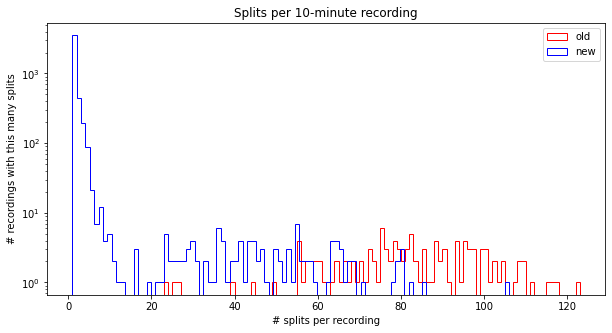

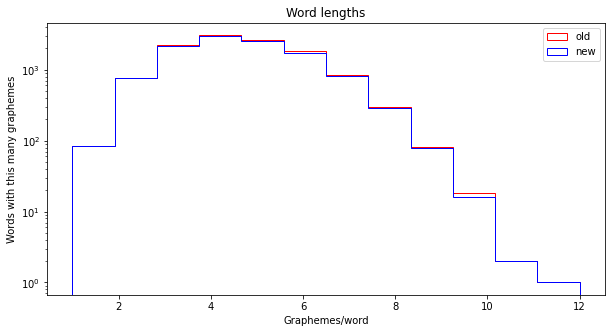

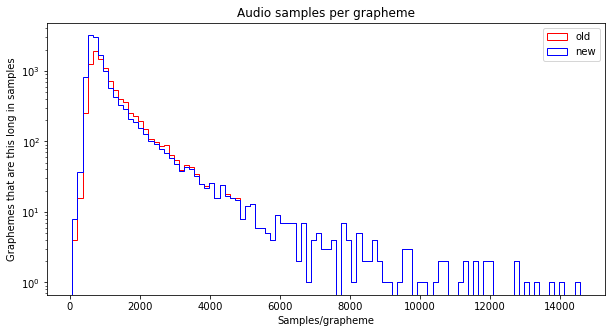

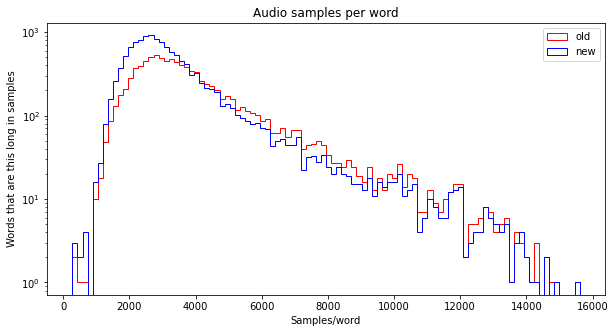

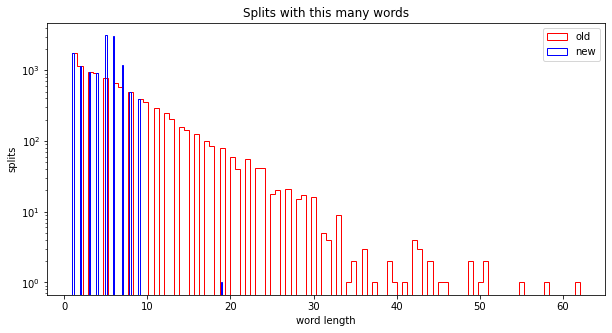

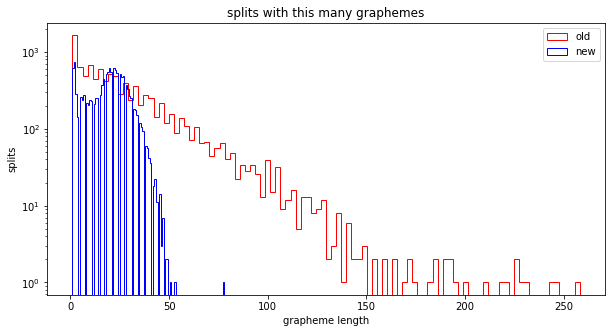

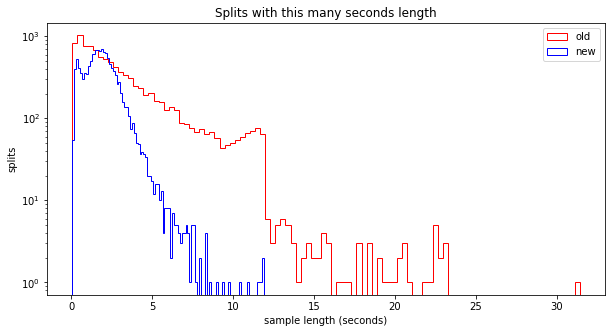

In [57]:
skinny.diff_visualization(subsplits) 

## Make a test training corpus

In [ ]:
clips=[]
for i, sound in enumerate(sounds):
    fn=f"frob/clip_{i}.wav"
    sf.write(fn, sound, C.sample_rate)
    clips.append(fn)

text='infer.txt'
manifest_fn='manifest.csv'
manifest='\n'.join([f'{audio},{text}' for audio in clips])
with open(manifest_fn, 'w') as f:        plt.show()
    f.write(manifest)

!cat manifest.csv

## ASR end-to-end speech-to-grapheme model stacked on top of grapheme-to-grapheme corrector model

In [ ]:
C.extension='_gradscaler'
C.batch_size=12
C.save_every = 5
C.start_from = 246

In [ ]:

import json, sys, os, librosa, random, math, time, torch
sys.path.append('/home/catskills/Desktop/openasr20/end2end_asr_pytorch')
os.environ['IN_JUPYTER']='True'
import numpy as np
import pandas as pd

from itertools import groupby
from operator import itemgetter
import soundfile as sf
from utils import constant
from utils.functions import load_model
from utils.data_loader import SpectrogramDataset, AudioDataLoader, BucketingSampler
from clip_ends import clip_ends
import torch.optim as optim
import torchtext
from torchtext.data import Field, BucketIterator
from torchtext.data import TabularDataset
import matplotlib.ticker as ticker
from IPython.display import Audio
from unidecode import unidecode
from seq_to_seq import *

In [ ]:
args=constant.args
args.continue_from=None
args.cuda = True
args.labels_path = C.grapheme_dictionary_fn
args.lr = 1e-4
args.name = C.model_name
args.save_folder = f'save'
args.epochs = 1000
args.save_every = 1
args.feat_extractor = f'vgg_cnn'
args.dropout = 0.1
args.num_layers = 4
args.num_heads = 8
args.dim_model = 512
args.dim_key = 64
args.dim_value = 64
args.dim_input = 161
args.dim_inner = 2048
args.dim_emb = 512
args.shuffle=True
args.min_lr = 1e-6
args.k_lr = 1
args.sample_rate=C.sample_rate
args.continue_from=C.best_model
args.augment=True
audio_conf = dict(sample_rate=args.sample_rate,
                  window_size=args.window_size,
                  window_stride=args.window_stride,
                  window=args.window,
                  noise_dir=args.noise_dir,
                  noise_prob=args.noise_prob,
                  noise_levels=(args.noise_min, args.noise_max))

In [ ]:
with open(args.labels_path, 'r') as label_file:
    labels = str(''.join(json.load(label_file)))
# add PAD_CHAR, SOS_CHAR, EOS_CHAR
labels = constant.PAD_CHAR + constant.SOS_CHAR + constant.EOS_CHAR + labels
label2id, id2label = {}, {}
count = 0
for i in range(len(labels)):
    if labels[i] not in label2id:
        label2id[labels[i]] = count
        id2label[count] = labels[i]
        count += 1
    else:
        print("multiple label: ", labels[i])

model, opt, epoch, metrics, loaded_args, label2id, id2label = load_model(constant.args.continue_from)

In [ ]:
train_data = SpectrogramDataset(audio_conf, manifest_filepath_list=[manifest_fn], 
                                label2id=label2id, normalize=True, augment=args.augment)
args.batch_size=1
train_sampler = BucketingSampler(train_data, batch_size=args.batch_size)
train_loader = AudioDataLoader(train_data, num_workers=args.num_workers, batch_sampler=train_sampler)

strs_hyps=[]
for i, (data) in enumerate(tqdm(train_loader)):
    src, tgt, _, src_lengths, tgt_lengths = data
    src = src.cuda()
    tgt = tgt.cuda()
    pred, gold, hyp_seq, gold_seq = model(src, src_lengths, tgt, verbose=False)
    seq_length = pred.size(1)
    for ut_hyp in hyp_seq:
        str_hyp = ""
        for x in ut_hyp:
            if int(x) == constant.PAD_TOKEN:
                break
            str_hyp = str_hyp + id2label[int(x)]
        strs_hyps.append(str_hyp)
for j in range(len(strs_hyps)):
    strs_hyps[j] = strs_hyps[j].replace(constant.SOS_CHAR, '').replace(constant.EOS_CHAR, '')

In [ ]:
gold_tgt = ' '.join([x.strip() for x in gold_tgt.split(' ') if x])
gold_tgt

In [ ]:
pred=' '.join(strs_hyps)
pred

In [ ]:
error_correction_training_fn='frob/pred_gold.tsv'
with open(error_correction_training_fn, 'w', encoding='utf-8') as f:
    f.write(f"{gold_tgt}\t{pred}")

In [ ]:
!cat frob/pred_gold.tsv

In [ ]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
tokenize=lambda x: [y for y in x]

SRC = Field(tokenize = tokenize, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True, 
            batch_first = True)

TRG = Field(tokenize = tokenize, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True, 
            batch_first = True)

In [ ]:
from torchtext.data import Iterator

In [ ]:
train_data = TabularDataset(
    path=error_correction_training_fn,
    format='tsv',
    fields=[('trg', TRG), ('src', SRC)])

In [ ]:
train_iterator = Iterator(train_data, batch_size=1)

In [ ]:
gold_fns=list(sorted(glob(f'{C.build_dir}/transcription_split/*.txt')))
len(gold_fns)
import os
goldrows=[]
for fn in gold_fns:
    with open(fn, 'r', encoding='utf-8') as f:
        goldrows.append(f.read())

MAX_LENGTH=max(len(x) for x in goldrows)+10
MAX_LENGTH

graphemes=''.join([x for x in C.grapheme_dictionary])

MIN_FREQ=1

In [ ]:
SRC.build_vocab(graphemes, min_freq = MIN_FREQ)

In [ ]:
TRG.build_vocab(graphemes, min_freq = MIN_FREQ)
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
INPUT_DIM, OUTPUT_DIM
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 1
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

In [ ]:
enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device,
              MAX_LENGTH)

In [ ]:
dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device,
              MAX_LENGTH)

In [ ]:
SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

In [ ]:
model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [ ]:
model_fn='tut6-model.pt'

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

model.apply(initialize_weights);

if os.path.exists(model_fn):
    model.load_state_dict(torch.load(model_fn))

LEARNING_RATE = 0.0005

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [ ]:
model.train()

In [ ]:
for j in range(100):
    epoch_loss = 0
    for i, batch in enumerate(train_iterator):

        src = batch.src.to(device)
        trg = batch.trg.to(device)

        optimizer.zero_grad()

        output, _ = model(src, trg[:,:-1])
        output_dim = output.shape[-1]
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)

        loss = criterion(output, trg)

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)

        optimizer.step()

        epoch_loss += loss.item()
        
    print(j, epoch_loss)

In [ ]:
pred=output.argmax(1).cpu().detach().numpy()
pred

In [ ]:
''.join([SRC.vocab.itos[x] for x in src.cpu().numpy()[0]])

In [ ]:
silver=''.join([TRG.vocab.itos[x] for x in trg.cpu().numpy()]).split('<eos>')[0]
silver

In [ ]:
pred=''.join([TRG.vocab.itos[x] for x in pred]).split('<eos>')[0]
pred

In [ ]:
from utils.metrics import calculate_cer, calculate_wer

In [ ]:
calculate_cer(pred, silver)

In [ ]:
calculate_wer(pred, silver)